# A Simple Linear Regression

### Importing the Usual Suspects


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the Data

In [4]:
df = pd.read_csv("data.csv")

df.head(9)

,Date,Step Count,Distance Travelled,Active Time,Flights Climbed,Goal,Percentage of Goal Completed,Calories
0,3/17/2021,1500,1.02 km,23:14 min,3,10000,15%,64
1,3/18/2021,3165,2.23 km,44:56 min,2,10000,32%,134
2,3/19/2021,1494,1.08 km,24:51 min,0,10000,15%,68
3,3/20/2021,1808,1.27 km,30:04 min,1,10000,18%,81
4,3/21/2021,2667,1.78 km,30:57 min,3,10000,27%,103
5,3/22/2021,2368,1.69 km,37:25 min,1,10000,24%,105
6,3/23/2021,3595,2.68 km,54:10 min,2,10000,36%,161
7,3/24/2021,779,0.58 km,13:08 min,2,10000,8%,36
8,3/25/2021,2566,1.87 km,38:38 min,1,10000,26%,113


### Creating the DataFrame

In [5]:
cdf = df[['Step Count','Calories']]

cdf.head(9)

,Step Count,Calories
0,1500,64
1,3165,134
2,1494,68
3,1808,81
4,2667,103
5,2368,105
6,3595,161
7,779,36
8,2566,113


### Plotting the Data

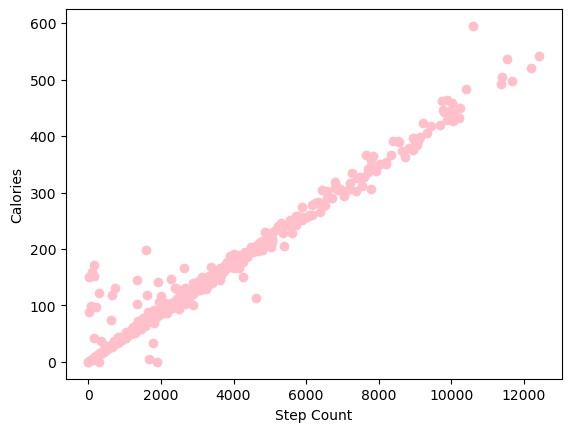

In [6]:
plt.scatter(cdf['Step Count'], cdf['Calories'],  color='pink')
plt.xlabel("Step Count")
plt.ylabel("Calories")
plt.show()

### Data Splitting (70/30) (train/test)

In [7]:
mask = np.random.rand(len(df)) < 0.7
train_data = cdf[mask]
test_data = cdf[~mask]

### Actual Work

In [8]:
from sklearn import linear_model

regression_model = linear_model.LinearRegression()

train_x = np.asanyarray(train_data[['Step Count']])
train_y = np.asanyarray(train_data[['Calories']])

regression_model.fit(train_x, train_y)

print ('Coefficients: ', regression_model.coef_)
print ('Intercept: ',regression_model.intercept_)

Coefficients:  [[0.04282699]]
Intercept:  [6.73761357]


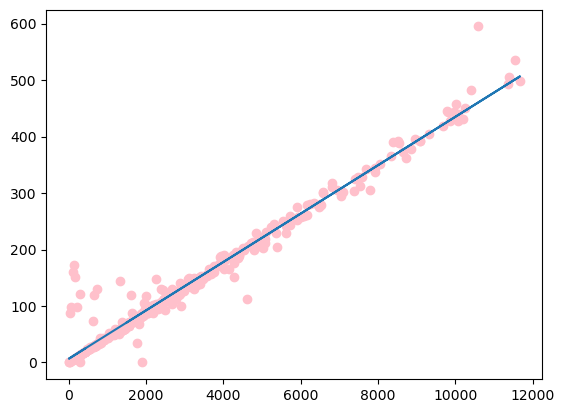

In [9]:
plt.scatter(train_data['Step Count'], train_data['Calories'],  color='pink')
plt.plot(train_x, regression_model.coef_[0][0]*train_x + regression_model.intercept_[0])
plt.show()

### Calculationg the R2 Score

In [10]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test_data[['Step Count']])
test_y = np.asanyarray(test_data[['Calories']])
test_y_prediction = regression_model.predict(test_x)

r2_score = round(r2_score(test_y, test_y_prediction), 2)

print("R2-score: ", r2_score)

R2-score:  0.97


### Predict a single step to its approximate calorie

In [11]:
step_input = np.array([[700]])
prediction_calorie = regression_model.predict(step_input).item()


print(f"Predicted value: {round(prediction_calorie)}")

Predicted value: 37
